In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import sys
sys.path.append('../../')

from astroLuSt.preprocessing import scaling as alprsc


import importlib
importlib.reload(alprsc)

#style for plotting
plt.style.use('astroLuSt.styles.LuSt_style')

# `AxisScaler`
Applying scaling along specific array axis

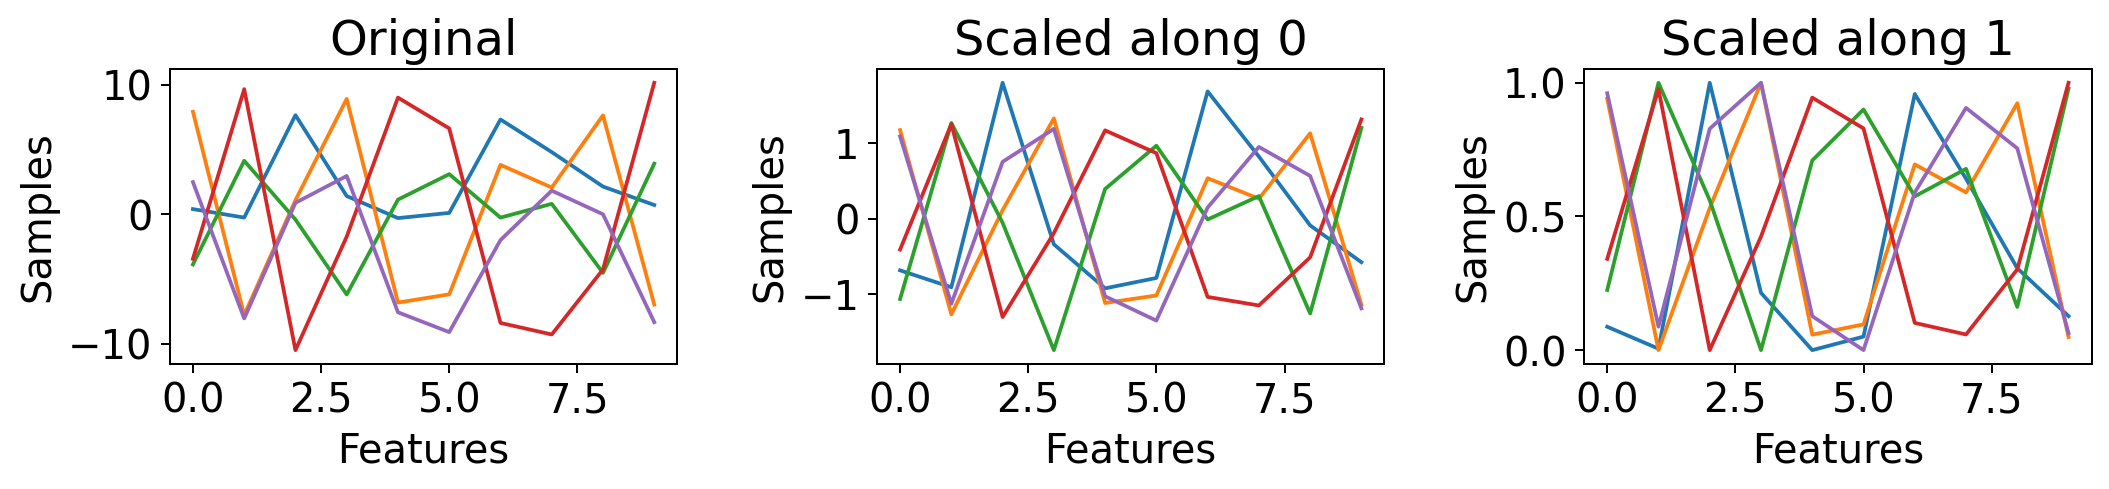

In [5]:
X, y = make_blobs(10, 5, )

AS0 = alprsc.AxisScaler(
    scaler=StandardScaler().fit_transform,
    axis=0,
)
AS1 = alprsc.AxisScaler(
    scaler=MinMaxScaler().fit_transform,
    axis=1,
)

X_sc0 = AS0.fit_transform(X)
X_sc1 = AS1.fit_transform(X)

fig = plt.figure(figsize=(12,3))
ax1 = fig.add_subplot(131, title="Original")
ax2 = fig.add_subplot(132, title="Scaled along 0")
ax3 = fig.add_subplot(133, title="Scaled along 1")
ax1.plot(X)
ax2.plot(X_sc0)
ax3.plot(X_sc1)
for ax in fig.axes:
    ax.set_xlabel("Features")
    ax.set_ylabel("Samples")
plt.show()